#Упражнение 1
  <p>Скачайте с сайта <a href="https://freesound.org/">https://freesound.org/</a> обрзец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?</p>
<p>
  Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?
  </p>

In [171]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Загружаем аудиозапись мелодии гитары


In [172]:
if not os.path.exists('545832__teresanski__electric-guitar-phrase.wav'):
    !wget https://github.com/donebd/telecom_spbstu2022/raw/main/res/lab1/545832__teresanski__electric-guitar-phrase.wav

Создаем объект wave

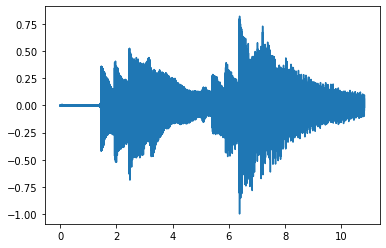

In [173]:
from thinkdsp import read_wave

wave = read_wave('545832__teresanski__electric-guitar-phrase.wav')
wave.plot()
wave.make_audio()

Выбираем сегмент в котором высота постоянна.

In [174]:
segment = wave.segment(1.3,0.5)
segment.make_audio()

Вычислим спектр и посмотрим его.


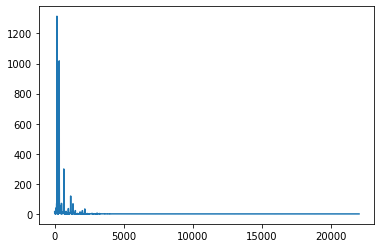

In [175]:
spectrum = segment.make_spectrum()
spectrum.plot()

Как мы видим звук локализован в первых 4000 ГЦ



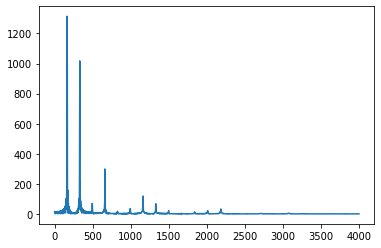

In [176]:
spectrum.plot(high = 4000)

Приблизим спектограмму до 1500ГЦ

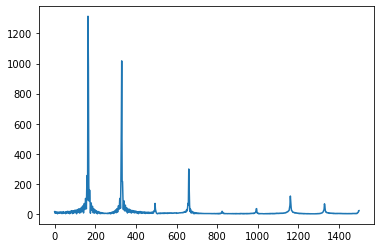

In [177]:
spectrum.plot(1500)

Обрежем от нашего сегмента все что выше 1500 ГЦ, послушаем как изменится звук.


In [178]:
spectrum.low_pass(1500)
filtered = spectrum.make_wave()

Исходный звук:

In [179]:
segment.make_audio()

Отфильтрованный выше 1500 ГЦ:

In [180]:
filtered.make_audio()

Как видим звук стал приглушеннее и как будто бы хуже по качеству, что закономерно т.к. мы обрезали частоты, следовательно изменили форму сигнала, она стала проще, что сказывается на тембре и восприятии звука.

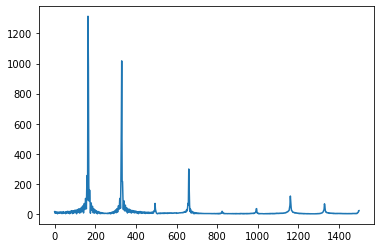

In [181]:
spectrum.plot(1500)

Посмотрим на пики еще раз, и разберем их.


In [182]:
spectrum.peaks()[:5]

[(1314.4506703297727, 164.0),
 (1017.6058892511392, 330.0),
 (978.2709691349118, 166.0),
 (560.8265132081144, 328.0),
 (298.90484912187424, 660.0)]

Основной и доминирующей частотой является 164ГЦ. Это нота ми малой октавы или E3 (164.81 ГЦ).<br>
330ГЦ - это гармоника, нота ми первой октавы (329.63 ГЦ)<br>
660гц - тоже гармоника, соответсвенно нота ми второй октавы (659.26)

По этим трем нотам можно попробовать создать аналогичное звучание

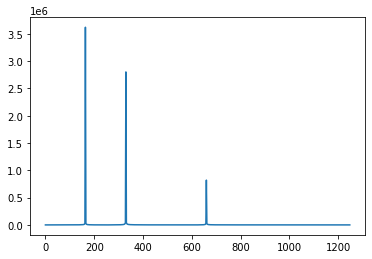

In [183]:
from thinkdsp import SinSignal
E_note = SinSignal(164,amp=1314,offset = 0)
E_note += SinSignal(330,amp=1017,offset = 0)
E_note += SinSignal(660,amp=298,offset = 0)
my_wave = E_note.make_wave(duration=0.5)
my_spectrum = my_wave.make_spectrum()
my_spectrum.plot(high = 1250)

Исходный сигнал, обрезанный сверху по 1500 ГЦ:

In [184]:
filtered.make_audio()

Собранный по трем нотам сигнал:

In [185]:
my_wave.make_audio()

Получилось достаточно схоже, если не считать что исходный сигнал все таки не очень статичен по высоте.

Теперь обрежем нашу основную частоту, и сигнал должен стать на октаву выше.

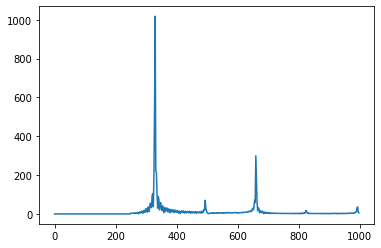

In [186]:
spectrum.high_pass(250)
spectrum.plot(1000)

In [187]:
higher_E = spectrum.make_wave()
higher_E.make_audio()

Звук стал выше, теперь вырежем ми второй октавы, и звук должен стать очень сухим, т.к. останется отдна доминирующая основная частота.

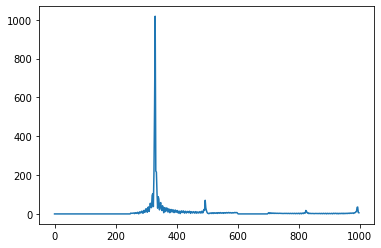

In [188]:
spectrum.band_stop(600,700)
spectrum.plot(1000)
dry_E = spectrum.make_wave()
dry_E.make_audio()

Теперь забавы ради возьмем оригинальный сигнал, и вырежем три ноты ми, посмотрим что останется

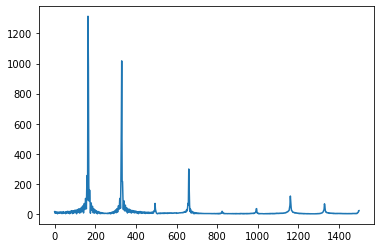

In [189]:
funny_spec = segment.make_spectrum()
funny_spec.plot(1500)

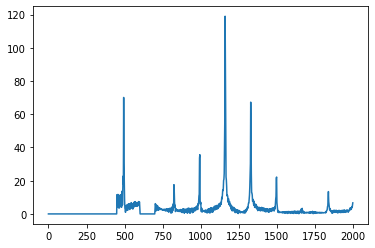

In [190]:
funny_spec.high_pass(450)
funny_spec.band_stop(600,700)
funny_spec.plot(2000)

In [191]:
funny_spec.peaks()[:10]

[(118.99392390227486, 1160.0),
 (82.79996901175551, 1162.0),
 (70.10530173362156, 494.0),
 (67.28320084505152, 1328.0),
 (58.16082542338096, 1158.0),
 (49.425864823422636, 1330.0),
 (42.799456229416, 1156.0),
 (39.038233316721396, 1164.0),
 (35.64331437508483, 994.0),
 (33.68657987337094, 992.0)]

Теперь мы видим,что основная частота 494 ГЦ - си первой октавы<br>
Доминирующая чамтота - 1160 ГЦ, это ре третьей октавы<br>
1328ГЦ - ми третьей октавы

In [192]:
funny_wave = funny_spec.make_wave()
funny_wave.make_audio()

Из гитары мы получили банжо

# Упражнение 2
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Соберем аккорд ля минор

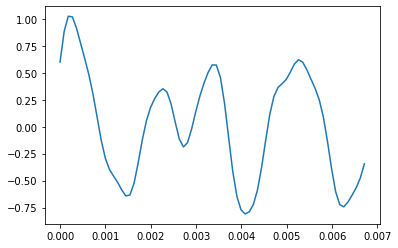

In [166]:
from thinkdsp import SinSignal, CosSignal

sin_A4 = SinSignal(freq=440.00,amp=0.7,offset=0)
cos_C5 = CosSignal(freq=523.25,amp=0.4,offset=0)
sin_E5 = SinSignal(freq=659.26,amp=0.3,offset=0)
cos_A5 = CosSignal(freq=880,amp=0.2,offset=0)
sin_A6 = SinSignal(freq=1760.00,amp=0.05,offset=0)
Am = sin_A4 + cos_C5 + sin_E5 + cos_A5 + sin_A6
Am_wave = Am.make_wave(duration=1)
Am.plot()
Am_wave.make_audio()

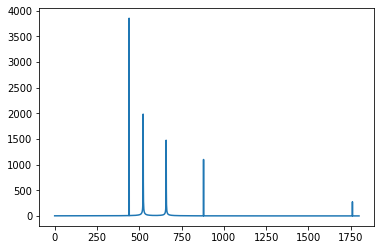

In [167]:
spectrum = Am_wave.make_spectrum()
spectrum.plot(high = 1800)

Мы можем добавить какую нибудь ноту, отличающуюся на полтона, и тогда должен получится "анти музыкальный" звук - звук который используют в "страшилках".

Добавим ноту A4# - ля диез первой октавы


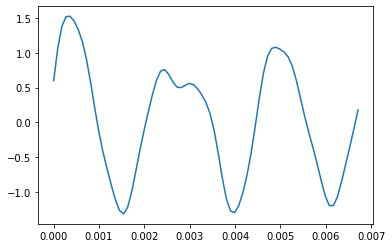

In [169]:
sin_A4_diez = SinSignal(freq=466.94,amp=0.7,offset=0)
brr_am = Am + sin_A4_diez
brr_am_wave = brr_am.make_wave(duration=1)
brr_am.plot()
brr_am_wave.make_audio()

Получилось действительно страшно и нагтетающе.

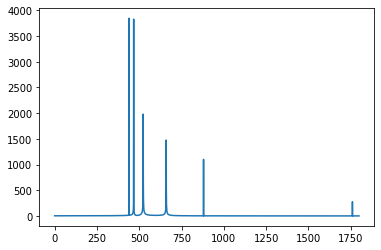

In [170]:
spectrum = brr_am_wave.make_spectrum()
spectrum.plot(high = 1800)

# Упражнение 3
Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate.

In [198]:
def stretch(wave, k):
  wave.ts /= k
  wave.framerate *= k

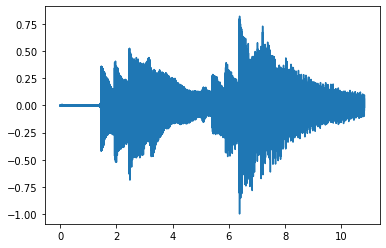

In [199]:
wave = read_wave('545832__teresanski__electric-guitar-phrase.wav')
wave.plot()
wave.make_audio()

Замедлим нашу запись в полтора раза

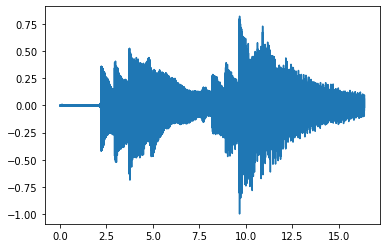

In [200]:
stretch(wave,0.66)
wave.plot()
wave.make_audio()

Ускорим в полтора в 2 раза

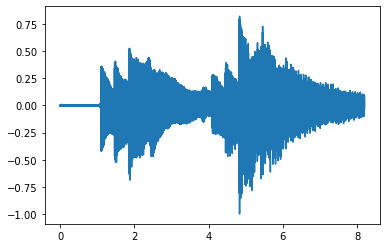

In [201]:
stretch(wave,2)
wave.plot()
wave.make_audio()